In [1]:
%config InlineBackend.figure_formats = ['svg']

import xarray as xr
import xyzpy as xyz
import numpy as np

def singuass(x, a, l, phi):
    return np.sin(x / l - phi) * np.exp(-x**2 / a)

r = xyz.Runner(singuass, 'sg(x)')

combos = {
    'x': np.linspace(-4, 4, 52),
    'a': [1, 2, 3],
    'l': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    'phi': [0, 1],
}

r.run_combos(combos)

100%|##########| 1872/1872 [00:00<00:00, 224309.71it/s]


<xarray.Dataset>
Dimensions:  (a: 3, l: 6, phi: 2, x: 52)
Coordinates:
  * x        (x) float64 -4.0 -3.843 -3.686 -3.529 ... 3.529 3.686 3.843 4.0
  * a        (a) int64 1 2 3
  * l        (l) float64 0.2 0.3 0.4 0.5 0.6 0.7
  * phi      (phi) int64 0 1
Data variables:
    sg(x)    (x, a, l, phi) float64 -1.027e-07 -9.415e-08 ... -0.004828

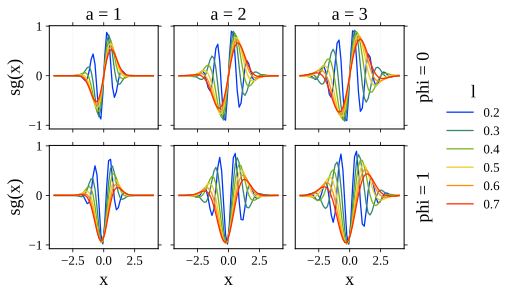

In [2]:
r.last_ds.xyz.lineplot(x='x', y='sg(x)', z='l', col='a', row='phi', 
                       colors=True, figsize=(6, 4))

In [3]:
r.last_ds.xyz.ilineplot(x='x', y='sg(x)', z='l', col='a', row='phi', 
                        colors=True, figsize=(6, 4))

Loading BokehJS ...

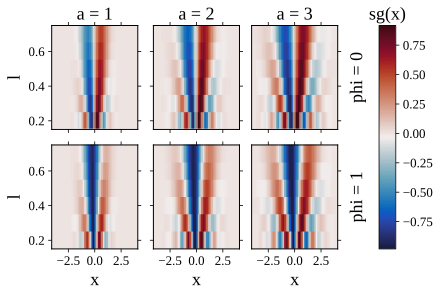

In [4]:
r.last_ds.xyz.heatmap(x='x', y='l', z='sg(x)', col='a', row='phi', 
                      colors=True, colormap='balance', figsize=(6, 4))

In [5]:
r.last_ds.xyz.iheatmap(x='x', y='l', z='sg(x)', col='a', row='phi', 
                       colors=True, colormap='balance', figsize=(6, 4))

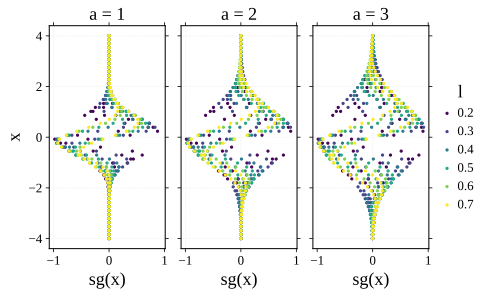

In [6]:
# note we have dropped the 'row' specification but can still plot all the data
r.last_ds.xyz.scatter(x='sg(x)', y='x', z='l', col='a',
                      colors=True, colormap='viridis', figsize=(6, 4))

In [7]:
r.last_ds.xyz.iscatter(x='sg(x)', y='x', z='l', col='a',
                       colors=True, colormap='viridis', figsize=(6, 4))

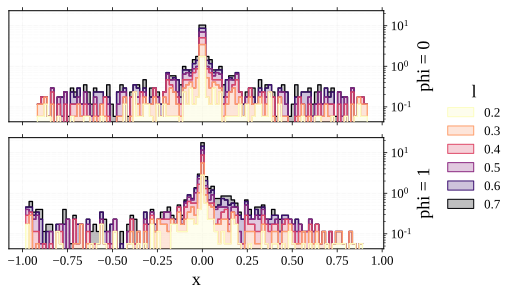

In [8]:
# note we have dropped the col specification
r.last_ds.xyz.histogram(x='sg(x)', z='l', row='phi',
                        bins=100, ylog=True, stacked=True, 
                        colors=True, colormap='magma_r', figsize=(6, 4))